# US ISP Fiber-optics Telecoms Network Analysis Using NetworkX

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

pd.set_option('precision', 2)
pd.set_option('notebook_repr_html', True)
pd.set_option('display.mpl_style', 'default')

import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

print('Done!')


Done!


## Dataset below gives the conduit sharing information (edges connecting the nodes). 

In [2]:
sharing_url = "https://s3-us-west-2.amazonaws.com/telecoms-analytics-dataset/sharing.txt"
shared_conduit = pd.read_csv(sharing_url, delim_whitespace=True, index_col=0, header=None)
shared_conduit.index.name = 'ISP Names'

# Initialize first column to ISP and set other columns to Sn => "Number of shared conduits"
col_names = []
for k in np.arange(1,shared_conduit.columns.size+1):
    col_names.append('S'+str(k)) 

# Set the columns names and display
shared_conduit.columns = col_names

shared_conduit.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S533,S534,S535,S536,S537,S538,S539,S540,S541,S542
ISP Names,,,,,,,,,,,,,,,,,,,,,
ATT,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verizon,0,0,0,10,0,18,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DeutscheTelekom,0,0,0,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# How do ISPs use the sharable conduits? How use what and how much?

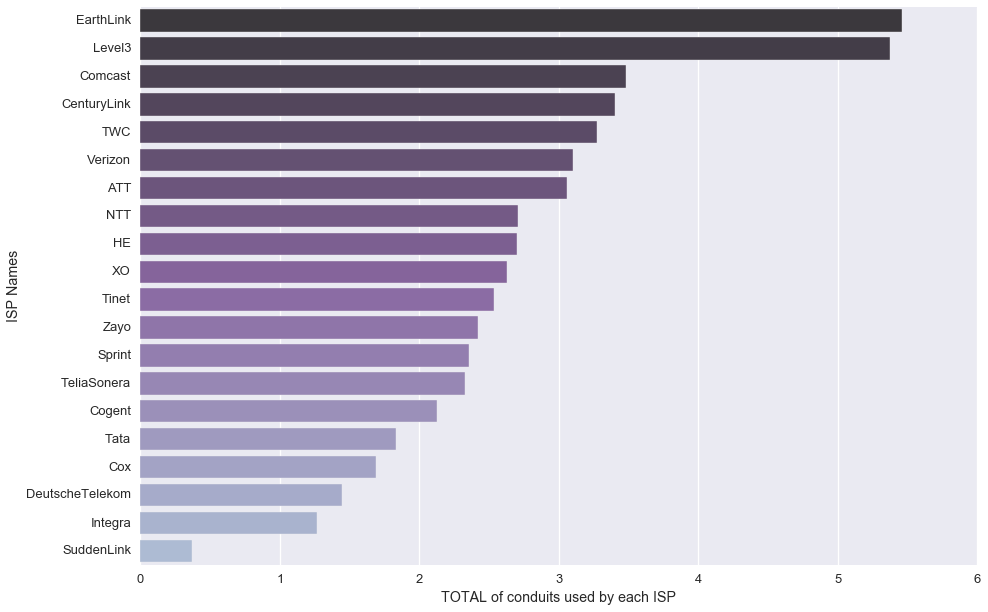

In [85]:
sum_across_conduit = shared_conduit.mean(axis=1)
sum_across_conduit.sort_values(ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=sum_across_conduit.index, x=sum_across_conduit.values, palette='BuPu_d')
plt.xlabel("TOTAL of conduits used by each ISP")

## Transpose the dataset

In [7]:
trans_shared_conduit = shared_conduit.transpose().copy()
trans_shared_conduit.head()

ISP Names,ATT,Verizon,DeutscheTelekom,XO,NTT,TeliaSonera,Sprint,Tata,CenturyLink,Cogent,Tinet,Level3,HE,Comcast,Cox,SuddenLink,EarthLink,Zayo,TWC,Integra
S1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0
S2,0,0,0,0,12,0,0,12,12,12,12,12,12,12,0,0,12,12,12,12
S3,0,0,0,0,9,0,0,0,9,0,9,9,0,9,0,0,9,9,9,9
S4,0,10,0,0,10,10,10,0,0,0,10,10,10,0,0,0,10,0,10,0
S5,0,0,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3,0,0,0


## Statistics for ISPs with top 10 conduit utilization 

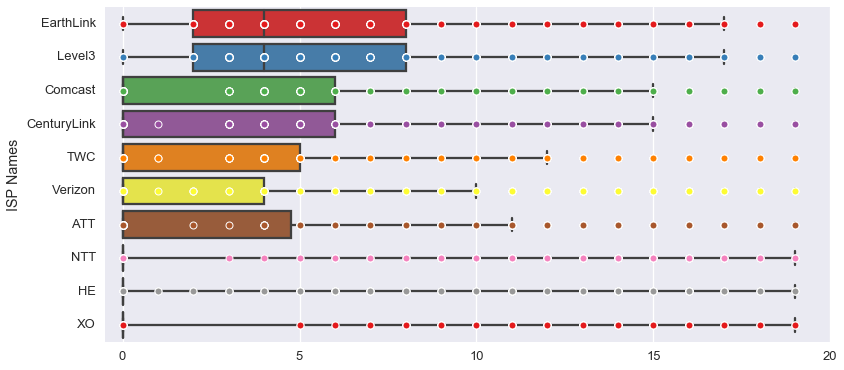

In [18]:
trans_shared_conduit = shared_conduit.transpose().copy()

plt.figure(figsize=(13,6)); plt.xlim(-0.5,20)
top_x = sum_across_conduit.index.values[:10]
ax = sns.boxplot(data=trans_shared_conduit[top_x], orient='h', palette='Set1')
ax = sns.stripplot(data=trans_shared_conduit[top_x], orient='h', palette='Set1', jitter=False)


## Adjacency Matrix (incomplete)

In [193]:
adj_matrix = np.array([ [ 1 if shared_conduit.ix[k,j] != 0 else 0 
                for j in shared_conduit.columns.values[:50] ]  for k in shared_conduit.index.values ])

adj_matrix.shape

(20, 50)

## Statistics for ISP sharing Conduits

In [174]:
conduit_counts = [len(shared_conduit[conduit].nonzero()[0]) for conduit in shared_conduit.columns]

df_conduit_counts = pd.DataFrame(conduit_counts, index=shared_conduit.columns)
df_conduit_counts.columns = ['ISP in Conduits']
df_conduit_counts.index.name = 'Conduits'
df = df_conduit_counts['ISP in Conduits']; 

# Compute the 1st, 2nd and 3rd Quantiles
first, secnd, third = df.quantile([.25, .5, .75]) 
df_conduit_counts.head(3)

,ISP in Conduits
Conduits,
S1,2
S2,12
S3,9


## How many `ISP` share a link? Whats the statistical summary?



Minimum : 1 	 Maximum : 19 	 Median : 4.0 	 Q1 : 2.0 	 Q2 : 4.0 	 Q3 : 8.0 	 Range : 18


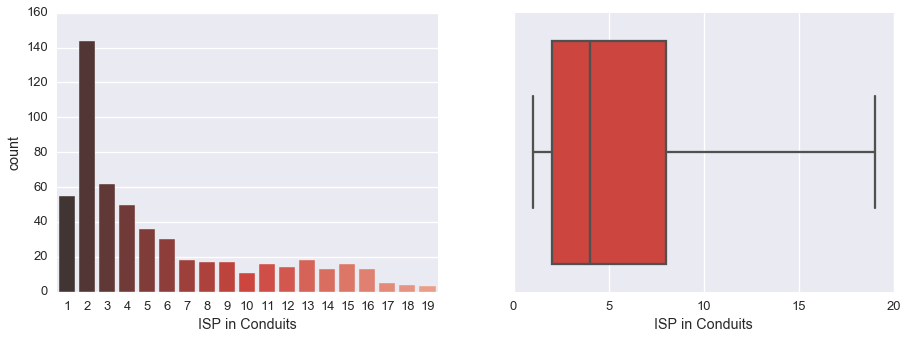

In [172]:
f, axes = plt.subplots(1,2, figsize=(15, 5))
ax = sns.boxplot(x='ISP in Conduits', data=df_conduit_counts, palette='Reds_d', ax=axes[1], whis=df.max())
ax = sns.countplot(x='ISP in Conduits', data=df_conduit_counts, palette='Reds_d', ax=axes[0])

print("\n\nMinimum : {} \t Maximum : {} \t Median : {} \t Q1 : {} \t Q2 : {} \t Q3 : {} \t Range : {}"
      .format(df.min(), df.max(), np.median(df), first, secnd, third, df.max()-df.min()))